# <font color='red'> main.ipynb </font>
# <font color='green'> CREDIT SCORING ENGINE </font>
### DESIGN AND DEVELOPMENT HEURISTICS OF AN UNSUPERVISED CREDIT SCORE ENGINE IN PYTHON
The Credit Score Engine is based on the concepts of feature representation, clustering and foundations of mathematics and finance.

In [14]:
import pandas as pd
import numpy as np
import csv
import json
import re
import dtale
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")
from ipynb.fs.full.prepare_dataset import * #===== for importing the encoded df from prepare_dataset.ipynb
from sklearn.metrics.pairwise import euclidean_distances

### PENALTY SCORE TO CREDIT SCORE CONVERSION
The conversion is done by normalizing the penalty scores to the credit score range [300,900]

In [2]:
def compute_score(df,MIN,MAX,RANGE):
    print("---------")
    print("MIN: ",MIN)
    print("MAX: ",MAX)
    print("RANGE: ",RANGE)
    max_value = df['penalty'].max()
    print("MAX_VALUE: ",max_value)
    df['score'] = (MAX - ((df['penalty']/max_value)*(MAX-MIN))).astype('int')
    print(df)
    return df

#=====================================================================================================

def compute_credit_score(df):
    FP =  np.percentile(df.penalty, 20)
    SP =  np.percentile(df.penalty, 40)
    TP =  np.percentile(df.penalty, 60)
    FRP = np.percentile(df.penalty, 80)
    
    print(SP)
    RANGE = 120 # as per the quantile size 
    
    df['penalty'] = df['penalty'].astype('float')
    dfp = df[df['penalty']<=FP]
    dsp = df.loc[(df['penalty']>FP) & (df['penalty']<=SP)]
    dtp = df.loc[(df['penalty']>SP) & (df['penalty']<=TP)]
    dfrp = df.loc[(df['penalty']>TP) & (df['penalty']<=FRP)]
    dftp = df[df['penalty']>FRP].reset_index(drop=True)
    dftp_mean = np.percentile(dftp.penalty,90)
    
    for i in range(len(dftp)):
        if dftp.loc[i,'penalty'] > dftp_mean:
            dftp.loc[i,'penalty'] = dftp_mean
    l = [dfp,dsp,dtp,dfrp,dftp]
    
    # passing the quantiles to compute_score() for computing the credit scores -------------
    
    for i in range(len(l)):
        MAX = 300 + ((len(l)-i)*RANGE)
        MIN = 300 + (((len(l)-i)-1)*RANGE)
        l[i] = compute_score(l[i],MIN,MAX,RANGE)
    D = pd.concat(l).reset_index(drop=True)
    return D

#====================================================================================================

### CREATING THE 2D PLANES FOR COMPUTING THE EUCLIDEAN DISTANCES
The centroid is computed for the age group of 25-40 in the first plane. All the points throughout the 3D space will have the Euclidean Distance measured in respect to this centroid.

In [3]:
p1 = df[df['plane']==1].reset_index(drop=True)
p2 = df[df['plane']==2].reset_index(drop=True)
p3 = df[df['plane']==3].reset_index(drop=True)
p4 = df[df['plane']==4].reset_index(drop=True)
planes=[p1,p2,p3,p4]
centroid = p1[p1['age_group']=='4']['amount_per_month'].mean()
C = [2,centroid]
print(C)

[2, 203.77484472049684]


### COMPUTING THE PENALTY SCORE FOR EACH RECORD
The penalty score is scaled with the reduce in the 2D plane the record belongs to. 

In [4]:
for i in range(len(planes)):
    p = planes[i]
    penalty = p.loc[0,'plane']
    X = 0.8
    for j in range(len(p)):
        print("------- PLANE ",i+1," -------")
        print("AGE GROUP: ",int(p.loc[j,'age_group']))
        print("AMOUNT PER MONTH: ",float(p.loc[j,'amount_per_month']))
        print("CENTROID: ",centroid)
        print("PENALTY: ",penalty)
        print()
        pt = [int(p.loc[j,'age_group']),float(p.loc[j,'amount_per_month'])]

        r = ( (math.dist(pt,C)*(abs(2-int(p.loc[j,'age_group'])))) + ( -centroid + float(p.loc[j,'amount_per_month']) ) )
    
        if r < 0: # =============== if amount_per_month >> centroid
            r = 0
        
        r+=housing['own']-p.loc[j,'Housing']
        r+=sex['male']-p.loc[j,'Sex']
        r+=saving['quite rich']-p.loc[j,'Saving accounts']
        r+=checking['rich']-p.loc[j,'Checking account']
        r+=(2-job[int(p.loc[j,'Job'])])
        r*=(15*penalty) # multiplying with 15 as each age group is 15 years in width on average
        p.loc[j,'penalty'] = r
        print(r)

------- PLANE  1  -------
AGE GROUP:  1
AMOUNT PER MONTH:  123.97916666666667
CENTROID:  203.77484472049684
PENALTY:  1

90.09398636285859
------- PLANE  1  -------
AGE GROUP:  3
AMOUNT PER MONTH:  187.66666666666666
CENTROID:  203.77484472049684
PENALTY:  1

105.46515426462042
------- PLANE  1  -------
AGE GROUP:  3
AMOUNT PER MONTH:  202.91666666666666
CENTROID:  203.77484472049684
PENALTY:  1

111.89360485886955
------- PLANE  1  -------
AGE GROUP:  2
AMOUNT PER MONTH:  193.0
CENTROID:  203.77484472049684
PENALTY:  1

90
------- PLANE  1  -------
AGE GROUP:  2
AMOUNT PER MONTH:  174.46666666666667
CENTROID:  203.77484472049684
PENALTY:  1

60
------- PLANE  1  -------
AGE GROUP:  2
AMOUNT PER MONTH:  107.91666666666667
CENTROID:  203.77484472049684
PENALTY:  1

120
------- PLANE  1  -------
AGE GROUP:  1
AMOUNT PER MONTH:  89.75
CENTROID:  203.77484472049684
PENALTY:  1

135.06577387420828
------- PLANE  1  -------
AGE GROUP:  1
AMOUNT PER MONTH:  130.58333333333334
CENTROID:  203.7

------- PLANE  1  -------
AGE GROUP:  2
AMOUNT PER MONTH:  354.1
CENTROID:  203.77484472049684
PENALTY:  1

2344.8773291925477
------- PLANE  1  -------
AGE GROUP:  2
AMOUNT PER MONTH:  118.66666666666667
CENTROID:  203.77484472049684
PENALTY:  1

75
------- PLANE  1  -------
AGE GROUP:  1
AMOUNT PER MONTH:  273.6666666666667
CENTROID:  203.77484472049684
PENALTY:  1

2186.861961585841
------- PLANE  1  -------
AGE GROUP:  3
AMOUNT PER MONTH:  196.03703703703704
CENTROID:  203.77484472049684
PENALTY:  1

90.96525310360174
------- PLANE  1  -------
AGE GROUP:  4
AMOUNT PER MONTH:  63.6
CENTROID:  203.77484472049684
PENALTY:  1

2148.0506858827525
------- PLANE  1  -------
AGE GROUP:  2
AMOUNT PER MONTH:  172.44444444444446
CENTROID:  203.77484472049684
PENALTY:  1

90
------- PLANE  1  -------
AGE GROUP:  1
AMOUNT PER MONTH:  108.69444444444444
CENTROID:  203.77484472049684
PENALTY:  1

60.07887842904175
------- PLANE  1  -------
AGE GROUP:  1
AMOUNT PER MONTH:  125.875
CENTROID:  203.7

6236.791085066345
------- PLANE  1  -------
AGE GROUP:  2
AMOUNT PER MONTH:  155.06666666666666
CENTROID:  203.77484472049684
PENALTY:  1

30
------- PLANE  1  -------
AGE GROUP:  1
AMOUNT PER MONTH:  81.91666666666667
CENTROID:  203.77484472049684
PENALTY:  1

90.06154592048247
------- PLANE  1  -------
AGE GROUP:  2
AMOUNT PER MONTH:  90.25
CENTROID:  203.77484472049684
PENALTY:  1

90
------- PLANE  1  -------
AGE GROUP:  2
AMOUNT PER MONTH:  326.1666666666667
CENTROID:  203.77484472049684
PENALTY:  1

1940.8773291925477
------- PLANE  1  -------
AGE GROUP:  2
AMOUNT PER MONTH:  301.53846153846155
CENTROID:  203.77484472049684
PENALTY:  1

1556.4542522694705
------- PLANE  1  -------
AGE GROUP:  4
AMOUNT PER MONTH:  214.83333333333334
CENTROID:  203.77484472049684
PENALTY:  1

608.0140275215948
------- PLANE  1  -------
AGE GROUP:  3
AMOUNT PER MONTH:  65.22222222222223
CENTROID:  203.77484472049684
PENALTY:  1

90.05413035274927
------- PLANE  1  -------
AGE GROUP:  3
AMOUNT PER MO

75
------- PLANE  1  -------
AGE GROUP:  3
AMOUNT PER MONTH:  332.7142857142857
CENTROID:  203.77484472049684
PENALTY:  1

3958.241395780311
------- PLANE  1  -------
AGE GROUP:  2
AMOUNT PER MONTH:  102.0
CENTROID:  203.77484472049684
PENALTY:  1

90
------- PLANE  1  -------
AGE GROUP:  2
AMOUNT PER MONTH:  76.54166666666667
CENTROID:  203.77484472049684
PENALTY:  1

105
------- PLANE  1  -------
AGE GROUP:  1
AMOUNT PER MONTH:  127.5
CENTROID:  203.77484472049684
PENALTY:  1

75.09832439215415
------- PLANE  1  -------
AGE GROUP:  1
AMOUNT PER MONTH:  117.83333333333333
CENTROID:  203.77484472049684
PENALTY:  1

45.08726570007347
------- PLANE  1  -------
AGE GROUP:  3
AMOUNT PER MONTH:  74.19444444444444
CENTROID:  203.77484472049684
PENALTY:  1

90.05787826184275
------- PLANE  1  -------
AGE GROUP:  1
AMOUNT PER MONTH:  61.75
CENTROID:  203.77484472049684
PENALTY:  1

90.05280700754923
------- PLANE  1  -------
AGE GROUP:  3
AMOUNT PER MONTH:  124.0
CENTROID:  203.77484472049684


393.7939958592139
------- PLANE  1  -------
AGE GROUP:  4
AMOUNT PER MONTH:  123.33333333333333
CENTROID:  203.77484472049684
PENALTY:  1

1222.3684391235765
------- PLANE  1  -------
AGE GROUP:  2
AMOUNT PER MONTH:  194.94444444444446
CENTROID:  203.77484472049684
PENALTY:  1

105
------- PLANE  1  -------
AGE GROUP:  4
AMOUNT PER MONTH:  215.11111111111111
CENTROID:  203.77484472049684
PENALTY:  1

605.3841790280333
------- PLANE  1  -------
AGE GROUP:  2
AMOUNT PER MONTH:  126.48717948717949
CENTROID:  203.77484472049684
PENALTY:  1

75
------- PLANE  1  -------
AGE GROUP:  2
AMOUNT PER MONTH:  117.5
CENTROID:  203.77484472049684
PENALTY:  1

75
------- PLANE  1  -------
AGE GROUP:  1
AMOUNT PER MONTH:  69.66666666666667
CENTROID:  203.77484472049684
PENALTY:  1

75.0559242236993
------- PLANE  1  -------
AGE GROUP:  2
AMOUNT PER MONTH:  107.83333333333333
CENTROID:  203.77484472049684
PENALTY:  1

45
------- PLANE  1  -------
AGE GROUP:  3
AMOUNT PER MONTH:  129.66666666666666
CENT


1145.2523291925472
------- PLANE  1  -------
AGE GROUP:  3
AMOUNT PER MONTH:  72.625
CENTROID:  203.77484472049684
PENALTY:  1

75.05718566430119
------- PLANE  1  -------
AGE GROUP:  2
AMOUNT PER MONTH:  109.97222222222223
CENTROID:  203.77484472049684
PENALTY:  1

75
------- PLANE  1  -------
AGE GROUP:  3
AMOUNT PER MONTH:  128.56666666666666
CENTROID:  203.77484472049684
PENALTY:  1

75.09971879033422
------- PLANE  1  -------
AGE GROUP:  1
AMOUNT PER MONTH:  41.0
CENTROID:  203.77484472049684
PENALTY:  1

105.0460754808148
------- PLANE  1  -------
AGE GROUP:  2
AMOUNT PER MONTH:  101.68888888888888
CENTROID:  203.77484472049684
PENALTY:  1

60
------- PLANE  2  -------
AGE GROUP:  3
AMOUNT PER MONTH:  174.66666666666666
CENTROID:  203.77484472049684
PENALTY:  2

240.51516713570916
------- PLANE  2  -------
AGE GROUP:  3
AMOUNT PER MONTH:  118.125
CENTROID:  203.77484472049684
PENALTY:  2

150.1751256981116
------- PLANE  2  -------
AGE GROUP:  4
AMOUNT PER MONTH:  254.9166666666

330.2257496902885
------- PLANE  2  -------
AGE GROUP:  3
AMOUNT PER MONTH:  72.7
CENTROID:  203.77484472049684
PENALTY:  2

180.11443676907675
------- PLANE  2  -------
AGE GROUP:  2
AMOUNT PER MONTH:  123.97222222222223
CENTROID:  203.77484472049684
PENALTY:  2

210
------- PLANE  2  -------
AGE GROUP:  2
AMOUNT PER MONTH:  64.66666666666667
CENTROID:  203.77484472049684
PENALTY:  2

240
------- PLANE  2  -------
AGE GROUP:  1
AMOUNT PER MONTH:  294.3333333333333
CENTROID:  203.77484472049684
PENALTY:  2

5733.674950527856
------- PLANE  2  -------
AGE GROUP:  2
AMOUNT PER MONTH:  128.5
CENTROID:  203.77484472049684
PENALTY:  2

240
------- PLANE  2  -------
AGE GROUP:  2
AMOUNT PER MONTH:  213.88888888888889
CENTROID:  203.77484472049684
PENALTY:  2

543.4213250517612
------- PLANE  2  -------
AGE GROUP:  2
AMOUNT PER MONTH:  337.22222222222223
CENTROID:  203.77484472049684
PENALTY:  2

4243.421325051761
------- PLANE  2  -------
AGE GROUP:  1
AMOUNT PER MONTH:  214.6
CENTROID:  203

PENALTY:  2

1989.254658385094
------- PLANE  2  -------
AGE GROUP:  2
AMOUNT PER MONTH:  75.1875
CENTROID:  203.77484472049684
PENALTY:  2

270
------- PLANE  2  -------
AGE GROUP:  2
AMOUNT PER MONTH:  172.45833333333334
CENTROID:  203.77484472049684
PENALTY:  2

210
------- PLANE  2  -------
AGE GROUP:  2
AMOUNT PER MONTH:  159.5
CENTROID:  203.77484472049684
PENALTY:  2

210
------- PLANE  2  -------
AGE GROUP:  3
AMOUNT PER MONTH:  172.76666666666668
CENTROID:  203.77484472049684
PENALTY:  2

210.48361764027538
------- PLANE  2  -------
AGE GROUP:  1
AMOUNT PER MONTH:  346.6666666666667
CENTROID:  203.77484472049684
PENALTY:  2

8723.614290001964
------- PLANE  2  -------
AGE GROUP:  3
AMOUNT PER MONTH:  122.85714285714286
CENTROID:  203.77484472049684
PENALTY:  2

150.18536645228266
------- PLANE  2  -------
AGE GROUP:  2
AMOUNT PER MONTH:  151.0
CENTROID:  203.77484472049684
PENALTY:  2

300
------- PLANE  2  -------
AGE GROUP:  2
AMOUNT PER MONTH:  214.58333333333334
CENTROID: 

360.179499887845
------- PLANE  3  -------
AGE GROUP:  2
AMOUNT PER MONTH:  115.0
CENTROID:  203.77484472049684
PENALTY:  3

360
------- PLANE  3  -------
AGE GROUP:  2
AMOUNT PER MONTH:  155.33333333333334
CENTROID:  203.77484472049684
PENALTY:  3

360
------- PLANE  3  -------
AGE GROUP:  1
AMOUNT PER MONTH:  100.0
CENTROID:  203.77484472049684
PENALTY:  3

495.2168105166792
------- PLANE  3  -------
AGE GROUP:  1
AMOUNT PER MONTH:  2425.8333333333335
CENTROID:  203.77484472049684
PENALTY:  3

200255.27410090086
------- PLANE  3  -------
AGE GROUP:  2
AMOUNT PER MONTH:  38.125
CENTROID:  203.77484472049684
PENALTY:  3

405
------- PLANE  3  -------
AGE GROUP:  1
AMOUNT PER MONTH:  225.55555555555554
CENTROID:  203.77484472049684
PENALTY:  3

2276.296455479378
------- PLANE  3  -------
AGE GROUP:  2
AMOUNT PER MONTH:  123.63333333333334
CENTROID:  203.77484472049684
PENALTY:  3

315
------- PLANE  3  -------
AGE GROUP:  2
AMOUNT PER MONTH:  253.52083333333334
CENTROID:  203.7748447204

PENALTY:  4

660
------- PLANE  4  -------
AGE GROUP:  2
AMOUNT PER MONTH:  316.3333333333333
CENTROID:  203.77484472049684
PENALTY:  4

7353.509316770188
------- PLANE  4  -------
AGE GROUP:  3
AMOUNT PER MONTH:  249.5
CENTROID:  203.77484472049684
PENALTY:  4

6087.674649108026
------- PLANE  4  -------
AGE GROUP:  2
AMOUNT PER MONTH:  341.55555555555554
CENTROID:  203.77484472049684
PENALTY:  4

8866.842650103521
------- PLANE  4  -------
AGE GROUP:  3
AMOUNT PER MONTH:  106.52777777777777
CENTROID:  203.77484472049684
PENALTY:  4

660.3084844399016
------- PLANE  4  -------
AGE GROUP:  3
AMOUNT PER MONTH:  92.83333333333333
CENTROID:  203.77484472049684
PENALTY:  4

600.2704072649713
------- PLANE  4  -------
AGE GROUP:  2
AMOUNT PER MONTH:  124.08333333333333
CENTROID:  203.77484472049684
PENALTY:  4

600
------- PLANE  4  -------
AGE GROUP:  2
AMOUNT PER MONTH:  175.11111111111111
CENTROID:  203.77484472049684
PENALTY:  4

600
------- PLANE  4  -------
AGE GROUP:  2
AMOUNT PER MO

### MERGING THE 2D PLANES DATAFRAMES BACK TO THE ORIGINAL DATASET

In [5]:
df = pd.concat([p1,p2,p3,p4]).reset_index(drop=True)

### VISUALIZING THE PENALTY SCORES V/S THE 2D PLANE THE RECORD BELONGS TO

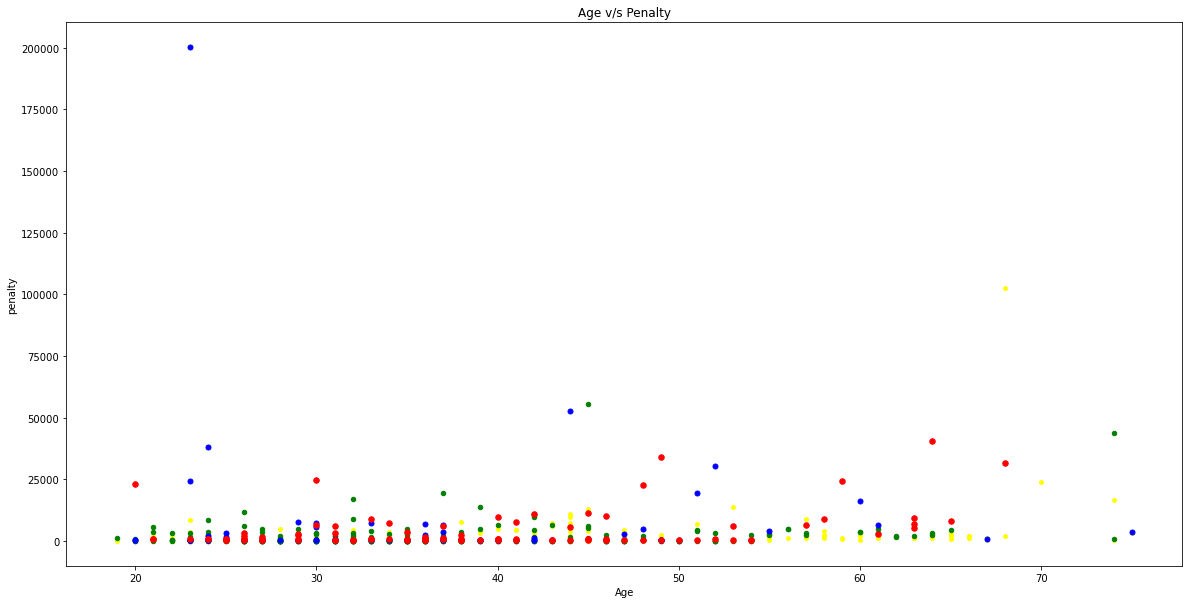

In [6]:
ax = plt.gca()
p1.plot(kind='scatter',x='Age',y='penalty',ax=ax,figsize=(20, 10),color='yellow',style="o",s=15)
p2.plot(kind='scatter',x='Age',y='penalty',ax=ax,color='green',figsize=(20, 10),style="o",s=20)
p3.plot(kind='scatter',x='Age',y='penalty',ax=ax,color='blue',figsize=(20, 10),style="o",s=25)
p4.plot(kind='scatter',x='Age',y='penalty',ax=ax,title='Age v/s Penalty',color='red',figsize=(20, 10),style="o",s=30)
plt.show()

### PASSING THE PENALTY SCORES FOR COMPUTING THE CREDIT SCORES

In [8]:
df = compute_credit_score(df)

180.0
---------
MIN:  780
MAX:  900
RANGE:  120
MAX_VALUE:  90.0
     Age Sex  Job Housing Saving accounts Checking account  Credit amount  \
3     35   2    3       1               1                2           6948   
4     28   2    3       3               1                2           5234   
10    32   1    1       3               2                1           1282   
14    44   2    2       3               2                2           1804   
16    42   1    2       1               3                3            409   
..   ...  ..  ...     ...             ...              ...            ...   
515   33   2    2       3               1                3           6289   
517   48   2    1       3               1                2           1743   
518   30   2    3       3               1                1           3959   
519   40   2    3       3               1                1           3857   
521   27   2    2       3               2                2           4576   

     Durat

### VISUALIZATION IN SUPPORT TO THE SCATTER PLOT ABOVE

PLANE 1: Have both savings and checking accounts
PLANE 2: Have both only saving account
PLANE 3: Have only checking account
PLANE 4: Have neither savings nor checking account


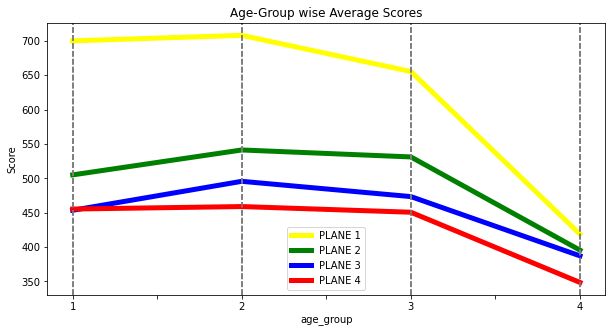

AGE GROUP 1: age < 25
AGE GROUP 2: age in [25,40)]
AGE GROUP 1: age in [40,55)
AGE GROUP 1: age > 55


In [9]:
print("PLANE 1: Have both savings and checking accounts")
print("PLANE 2: Have both only saving account")
print("PLANE 3: Have only checking account")
print("PLANE 4: Have neither savings nor checking account")


def plane_wise_score(df,c,plane):
    ax = plt.gca()
    df['age_group'] = df.index
    new_name = 'PLANE '+str(plane)
    df = df.rename({'score':new_name},axis=1)
    df.plot(kind='line',x='age_group',y=new_name,ax=ax,figsize=(10, 5),color=c,title='Age-Group wise Average Scores',lw=5)
    ax.axvline(0, color="grey", linestyle="--")
    ax.axvline(1, color="grey", linestyle="--")
    ax.axvline(2, color="grey", linestyle="--")
    ax.axvline(3, color="grey", linestyle="--")

plane_wise_score(pd.DataFrame(df[df['plane']==1].reset_index(drop=True).groupby('age_group')['score'].mean()),'yellow',1)
plane_wise_score(pd.DataFrame(df[df['plane']==2].reset_index(drop=True).groupby('age_group')['score'].mean()),'green',2)
plane_wise_score(pd.DataFrame(df[df['plane']==3].reset_index(drop=True).groupby('age_group')['score'].mean()),'blue',3)
plane_wise_score(pd.DataFrame(df[df['plane']==4].reset_index(drop=True).groupby('age_group')['score'].mean()),'red',4)


plt.ylabel('Score')
plt.show()

print("AGE GROUP 1: age < 25")
print("AGE GROUP 2: age in [25,40)]")
print("AGE GROUP 1: age in [40,55)")
print("AGE GROUP 1: age > 55")


### STORING THE RESULTS
The file 'encoded_attributes_result.csv' stores the results in encoded format alongside all the additional created attributes. 'result.csv', on the other hand, stores the result in the original dataset format.

In [10]:
df = df.sample(frac = 1).reset_index(drop=True)
df.to_csv('encoded_attributes_result.csv',index=False)

In [11]:
def get_key(val,my_dict):
    for key, value in my_dict.items():
         if val == value:
             return key

In [12]:
df2 = df.copy()
for i in range(len(df2)):
    df2.loc[i,'Sex'] = get_key(df.loc[i,'Sex'],sex)
    df2.loc[i,'Housing'] = get_key(df.loc[i,'Housing'],housing)
    df2.loc[i,'Saving accounts'] = get_key(df.loc[i,'Saving accounts'],saving)
    df2.loc[i,'Checking account'] = get_key(df.loc[i,'Checking account'],checking)
df2 = df2.drop(['age_group','penalty','amount_per_month','plane'],axis=1)

In [13]:
df2.to_csv("result.csv",index=False)